# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [1]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
# A)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# B)
(df.isnull().sum() / len(df)) * 100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


In [5]:
# A)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
print(f"Número de registros antes do tratamentos de outliers: {df.shape}")

Número de registros antes do tratamentos de outliers: (1599, 12)


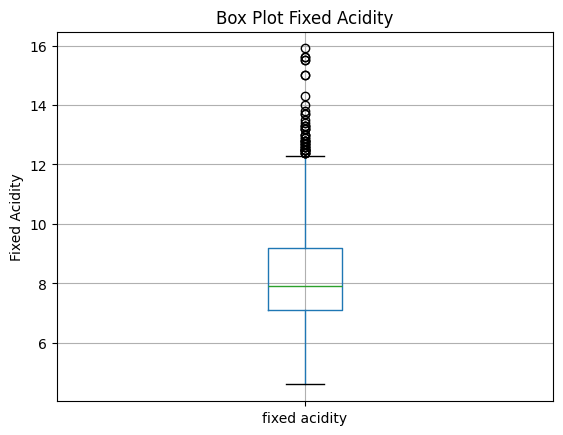

In [7]:
# Variável 'fixed acidity'
df.boxplot(column="fixed acidity")
plt.title("Box Plot Fixed Acidity")
plt.ylabel("Fixed Acidity")
plt.show()

In [8]:
# Método IQR
Q1 = df['fixed acidity'].quantile(0.25)
Q3 = df['fixed acidity'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_fixed_acidity = df[(df['fixed acidity'] <= (Q1 - 1.5 * IQR)) | (df['fixed acidity'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_fixed_acidity)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
205            12.8             0.300         0.74             2.6      0.095   
206            12.8             0.300         0.74             2.6      0.095   
243            15.0             0.210         0.44             2.2      0.075   
244            15.0             0.210         0.44             2.2      0.075   
264            12.5             0.560         0.49             2.4      0.064   
294            13.3             0.340         0.52             3.2      0.094   
328            13.4             0.270         0.62             2.6      0.082   
338            12.4             0.490         0.58             3.0      0.103   
339            12.5             0.280         0.54             2.3      0.082   
347            13.8             0.490         0.67             3.0      0.093   
353            13.5             0.530         0.79             4.8      0.120   
359            12.6         

In [9]:
# Filtragem e manutenção das ocorrências com 'fixed acidity' <= 14.3
df = df[(df['fixed acidity'] <= 14.3)]

- Foram mantidos os dados outliers de **fixed acidity** que estão no cluster mais próximo do limite superior (<= 14.3), pois podem de fato representar uma característica variada das uvas e consequentemente dos vinhos.
- Os dados ou clusters que se afastam demais podem também representar uma variedade específica, mas nesta abordagem, vou considerar os dados distantes do cluster do limite como sendo anomalias ou erros de amostragem.

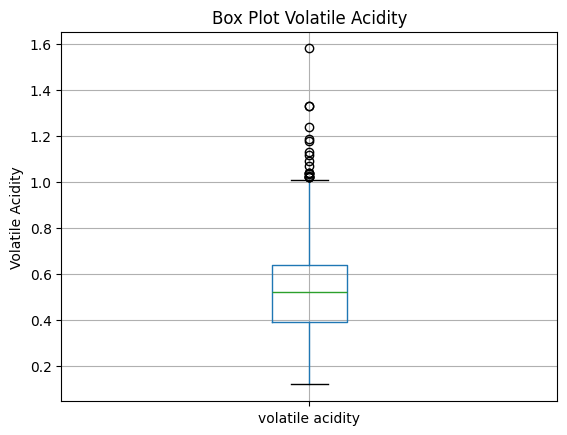

In [10]:
# Variável 'volatile acidity'
df.boxplot(column="volatile acidity")
plt.title("Box Plot Volatile Acidity")
plt.ylabel("Volatile Acidity")
plt.show()

In [11]:
# Método IQR
Q1 = df['volatile acidity'].quantile(0.25)
Q3 = df['volatile acidity'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_volatile_acidity = df[(df['volatile acidity'] <= (Q1 - 1.5 * IQR)) | (df['volatile acidity'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_volatile_acidity)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
38              5.7             1.130         0.09            1.50      0.172   
94              5.0             1.020         0.04            1.40      0.045   
120             7.3             1.070         0.09            1.70      0.178   
126             8.2             1.330         0.00            1.70      0.081   
127             8.1             1.330         0.00            1.80      0.082   
134             7.9             1.040         0.05            2.20      0.084   
199             6.9             1.090         0.06            2.10      0.061   
553             5.0             1.040         0.24            1.60      0.050   
672             9.8             1.240         0.34            2.00      0.079   
690             7.4             1.185         0.00            4.25      0.097   
700            10.6             1.020         0.43            2.90      0.076   
705             8.4         

In [12]:
# Filtragem e manutenção das ocorrências com 'volatile acidity' <= 1.2
df = df[(df['volatile acidity'] <= 1.2)]

- Foram mantidos os dados outliers de **volatile acidity** que estão no cluster mais próximo do limite superior (<= 1.2), pois podem de fato representar uma característica variada das uvas e consequentemente dos vinhos.
- Os dados ou clusters que se afastam demais podem também representar uma variedade específica, mas nesta abordagem, vou considerar os dados distantes do cluster do limite como sendo anomalias ou erros de amostragem.

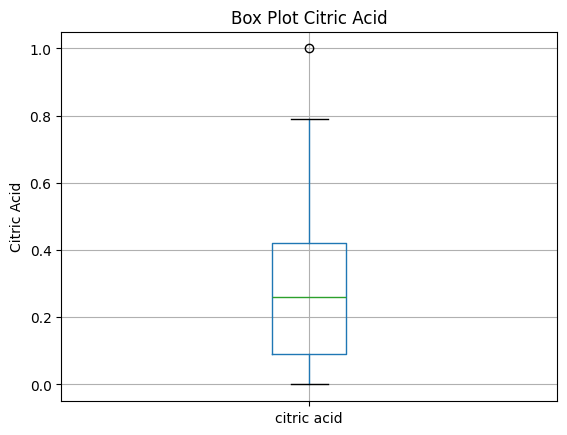

In [13]:
# Variável 'citric acid'
df.boxplot(column="citric acid")
plt.title("Box Plot Citric Acid")
plt.ylabel("Citric Acid")
plt.show()

In [14]:
# Método IQR
Q1 = df['citric acid'].quantile(0.25)
Q3 = df['citric acid'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_citric_acid = df[(df['citric acid'] <= (Q1 - 1.5 * IQR)) | (df['citric acid'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_citric_acid)

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
151            9.2              0.52          1.0             3.4       0.61   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
151                 32.0                  69.0   0.9996  2.74        2.0   

     alcohol  quality  
151      9.4        4  


In [15]:
# Filtragem e manutenção das ocorrências com 'citric acid' < limite superior
df = df[(df['citric acid'] < 0.8)]

- Os outliers foram removidos para a variável **citric acid**, e foram mantidos apenas os dados contidos dentro dos limites inferior e superior.

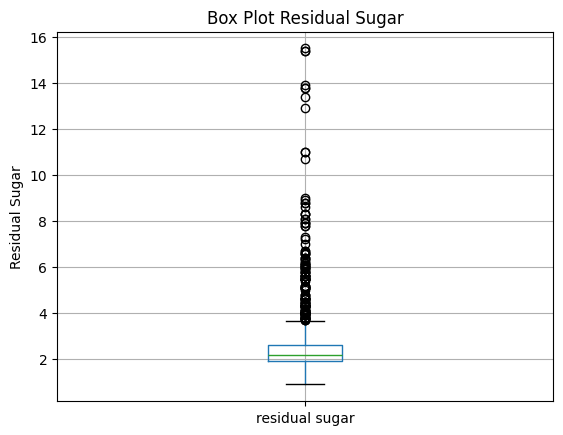

In [16]:
# Variável 'residual sugar'
df.boxplot(column="residual sugar")
plt.title("Box Plot Residual Sugar")
plt.ylabel("Residual Sugar")
plt.show()

In [17]:
# Método IQR
Q1 = df['residual sugar'].quantile(0.25)
Q3 = df['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_residual_sugar = df[(df['residual sugar'] <= (Q1 - 1.5 * IQR)) | (df['residual sugar'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_residual_sugar)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9               7.5             0.500         0.36             6.1      0.071   
11              7.5             0.500         0.36             6.1      0.071   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
18              7.4             0.590         0.08             4.4      0.086   
...             ...               ...          ...             ...        ...   
1552            6.3             0.680         0.01             3.7      0.103   
1558            6.9             0.630         0.33             6.7      0.235   
1574            5.6             0.310         0.78            13.9      0.074   
1577            6.2             0.700         0.15             5.1      0.076   
1589            6.6             0.725         0.20             7.8      0.073   

      free sulfur dioxide  

In [18]:
# Filtragem e manutenção das ocorrências com 'residual sugar' <= 9
df = df[(df['residual sugar'] <= 9)]

- Foram mantidos os dados outliers de **residual sugar** que estão no cluster mais próximo do limite superior (<= 9), pois podem de fato representar uma característica variada das uvas e consequentemente dos vinhos.
- Os dados ou clusters que se afastam demais podem também representar uma variedade específica, mas nesta abordagem, vou considerar os dados distantes do cluster do limite como sendo anomalias ou erros de amostragem.

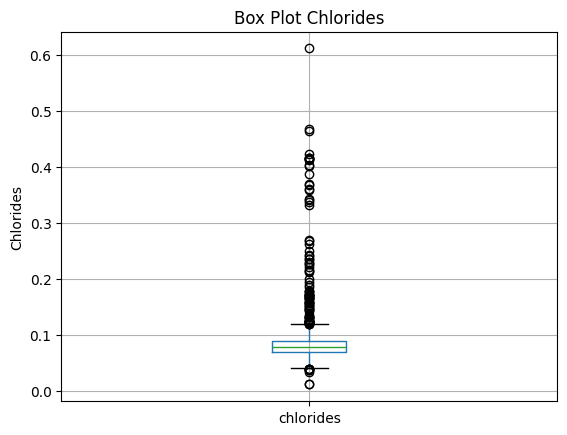

In [19]:
# Variável 'chlorides'
df.boxplot(column="chlorides")
plt.title("Box Plot Chlorides")
plt.ylabel("Chlorides")
plt.show()

In [20]:
# Método IQR
Q1 = df['chlorides'].quantile(0.25)
Q3 = df['chlorides'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_chlorides = df[(df['chlorides'] <= (Q1 - 1.5 * IQR)) | (df['chlorides'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_chlorides)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
14              8.9              0.62         0.18             3.8      0.176   
15              8.9              0.62         0.19             3.9      0.170   
17              8.1              0.56         0.28             1.7      0.368   
19              7.9              0.32         0.51             1.8      0.341   
38              5.7              1.13         0.09             1.5      0.172   
...             ...               ...          ...             ...        ...   
1436           10.0              0.38         0.38             1.6      0.169   
1490            7.1              0.22         0.49             1.8      0.039   
1558            6.9              0.63         0.33             6.7      0.235   
1570            6.4              0.36         0.53             2.2      0.230   
1571            6.4              0.38         0.14             2.2      0.038   

      free sulfur dioxide  

In [21]:
# Filtragem e manutenção das ocorrências com 'chlorides' >= 0 e <= 0.27
df = df[(df['chlorides'] >= 0) & (df['chlorides'] <= 0.27)]

- Foram mantidos os dados outliers de **chlorides** que estão nos clusters mais próximo do limite inferior (>= 0) e limite superior (<= 0.27), pois podem de fato representar uma característica variada das uvas e consequentemente dos vinhos.
- Os dados ou clusters que se afastam demais podem também representar uma variedade específica, mas nesta abordagem, vou considerar os dados distantes do cluster do limite como sendo anomalias ou erros de amostragem.

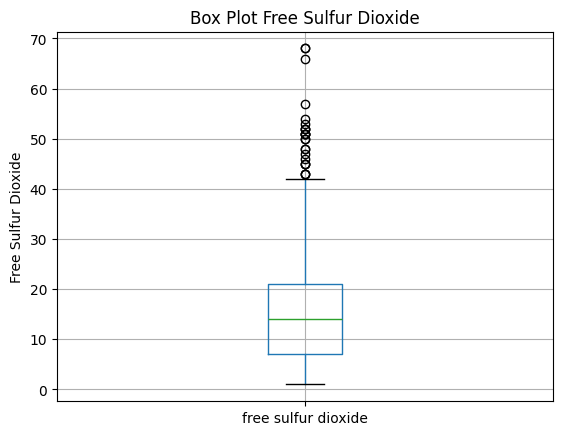

In [22]:
# Variável 'free sulfur dioxide'
df.boxplot(column="free sulfur dioxide")
plt.title("Box Plot Free Sulfur Dioxide")
plt.ylabel("Free Sulfur Dioxide")
plt.show()

In [23]:
# Método IQR
Q1 = df['free sulfur dioxide'].quantile(0.25)
Q3 = df['free sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_free_sulfur_dioxide = df[(df['free sulfur dioxide'] <= (Q1 - 1.5 * IQR)) | (df['free sulfur dioxide'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_free_sulfur_dioxide)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
57              7.5             0.630         0.12            5.10      0.111   
90              7.9             0.520         0.26            1.90      0.079   
396             6.6             0.735         0.02            7.90      0.122   
400             6.6             0.735         0.02            7.90      0.122   
497             7.2             0.340         0.32            2.50      0.090   
522             8.2             0.390         0.49            2.30      0.099   
584            11.8             0.330         0.49            3.40      0.093   
634             7.9             0.350         0.21            1.90      0.073   
678             8.3             0.780         0.10            2.60      0.081   
925             8.6         

In [24]:
# Filtragem e manutenção das ocorrências com 'free sulfur dioxide' <= 54
df = df[(df['free sulfur dioxide'] <= 54)]

- Foram mantidos os dados outliers de **free sulfur dioxide** que estão no cluster mais próximo do limite superior (<= 54), pois podem de fato representar uma característica variada das uvas e consequentemente dos vinhos.
- Os dados ou clusters que se afastam demais podem também representar uma variedade específica, mas nesta abordagem, vou considerar os dados distantes do cluster do limite como sendo anomalias ou erros de amostragem.

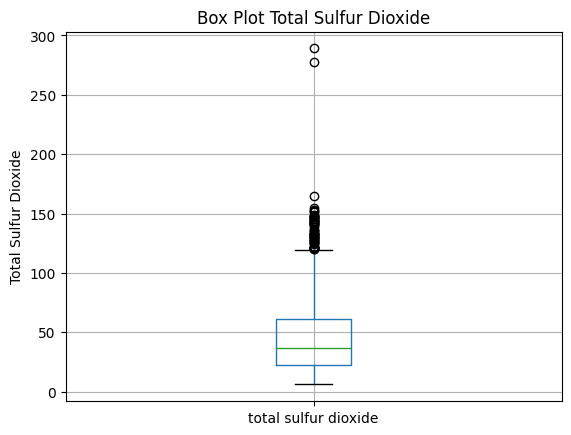

In [25]:
# Variável 'total sufur dioxide'
df.boxplot(column="total sulfur dioxide")
plt.title("Box Plot Total Sulfur Dioxide")
plt.ylabel("Total Sulfur Dioxide")
plt.show()

In [26]:
# Método IQR
Q1 = df['total sulfur dioxide'].quantile(0.25)
Q3 = df['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_total_sulfur_dioxide = df[(df['total sulfur dioxide'] <= (Q1 - 1.5 * IQR)) | (df['total sulfur dioxide'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_total_sulfur_dioxide)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
86              8.6             0.490         0.28             1.9      0.110   
88              9.3             0.390         0.44             2.1      0.107   
90              7.9             0.520         0.26             1.9      0.079   
91              8.6             0.490         0.28             1.9      0.110   
92              8.6             0.490         0.29             2.0      0.110   
109             8.1             0.785         0.52             2.0      0.122   
130             8.0             0.745         0.56             2.0      0.118   
145             8.1             0.670         0.55             1.8      0.117   
154             7.1             0.430         0.42             5.5      0.070   
155             7.1         

In [27]:
# Filtragem e manutenção das ocorrências com 'total sulfur dioxide' <= 153
df = df[(df['total sulfur dioxide'] <= 153)]

- Foram mantidos os dados outliers de **total sulfur dioxide** que estão no cluster mais próximo do limite superior (<= 153), pois podem de fato representar uma característica variada das uvas e consequentemente dos vinhos.
- Os dados ou clusters que se afastam demais podem também representar uma variedade específica, mas nesta abordagem, vou considerar os dados distantes do cluster do limite como sendo anomalias ou erros de amostragem.

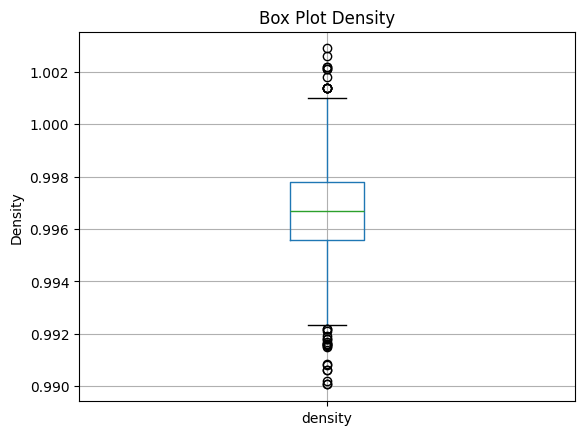

In [28]:
# Variável 'density'
df.boxplot(column="density")
plt.title("Box Plot Density")
plt.ylabel("Density")
plt.show()

In [29]:
# Método IQR
Q1 = df['density'].quantile(0.25)
Q3 = df['density'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_density = df[(df['density'] <= (Q1 - 1.5 * IQR)) | (df['density'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_density)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
142             5.2             0.340         0.00            1.80      0.050   
144             5.2             0.340         0.00            1.80      0.050   
294            13.3             0.340         0.52            3.20      0.094   
353            13.5             0.530         0.79            4.80      0.120   
364            12.8             0.615         0.66            5.80      0.083   
366            12.8             0.615         0.66            5.80      0.083   
374            14.0             0.410         0.63            3.80      0.089   
381            13.7             0.415         0.68            2.90      0.085   
391            13.7             0.415         0.68            2.90      0.085   
415             8.6             0.725         0.24            6.60      0.117   
538            12.9             0.350         0.49            5.80      0.066   
559            13.0         

In [30]:
# Filtragem e manutenção das ocorrências com 'density' >= 0.9915 e <= 1.003
df = df[(df['density'] >= 0.9915) & (df['density'] <= 1.003)]

- Foram mantidos os dados outliers de **density** que estão nos clusters mais próximo do limite inferior (>= 0.9915) e limite superior (<= 1.003), pois podem de fato representar uma característica variada das uvas e consequentemente dos vinhos.
- Os dados ou clusters que se afastam demais podem também representar uma variedade específica, mas nesta abordagem, vou considerar os dados distantes do cluster do limite como sendo anomalias ou erros de amostragem.

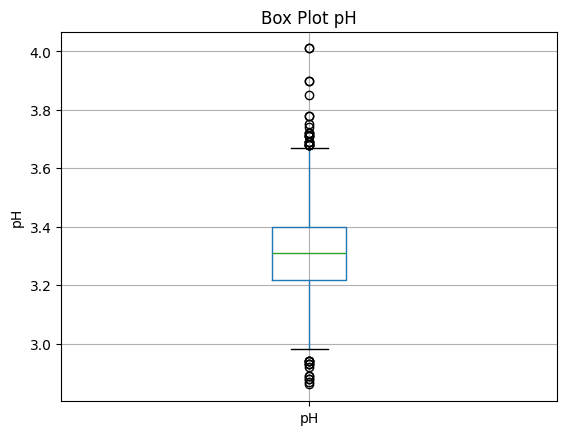

In [31]:
# Variável 'pH'
df.boxplot(column="pH")
plt.title("Box Plot pH")
plt.ylabel("pH")
plt.show()

In [32]:
# Método IQR
Q1 = df['pH'].quantile(0.25)
Q3 = df['pH'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_ph = df[(df['pH'] <= (Q1 - 1.5 * IQR)) | (df['pH'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_ph)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
45              4.6             0.520         0.15            2.10      0.054   
86              8.6             0.490         0.28            1.90      0.110   
91              8.6             0.490         0.28            1.90      0.110   
92              8.6             0.490         0.29            2.00      0.110   
94              5.0             1.020         0.04            1.40      0.045   
95              4.7             0.600         0.17            2.30      0.058   
142             5.2             0.340         0.00            1.80      0.050   
144             5.2             0.340         0.00            1.80      0.050   
268             6.9             0.540         0.04            3.00      0.077   
276             6.9             0.540         0.04            3.00      0.077   
299             6.9             0.670         0.06            2.10      0.080   
440            12.6         

In [33]:
# Filtragem e manutenção das ocorrências com 'pH' >= 2.8 e <= 3.8
df = df[(df['pH'] >= 2.8) & (df['pH'] <= 3.8)]

- Foram mantidos os dados outliers de **pH** que estão nos clusters mais próximo do limite inferior (>= 2.8) e limite superior (<= 3.8), pois podem de fato representar uma característica variada das uvas e consequentemente dos vinhos.
- Os dados ou clusters que se afastam demais podem também representar uma variedade específica, mas nesta abordagem, vou considerar os dados distantes do cluster do limite como sendo anomalias ou erros de amostragem.

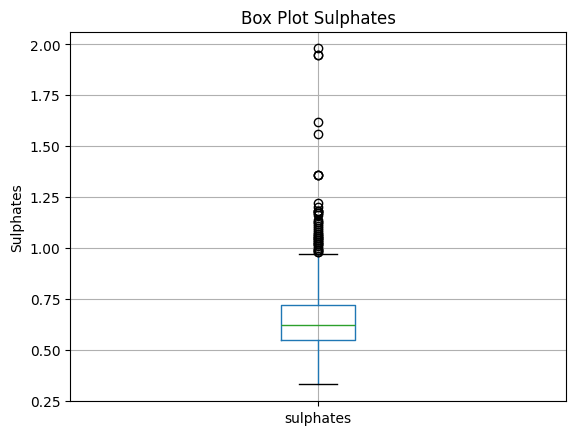

In [34]:
# Variável 'sulphates'
df.boxplot(column="sulphates")
plt.title("Box Plot Sulphates")
plt.ylabel("Sulphates")
plt.show()

In [35]:
# Método IQR
Q1 = df['sulphates'].quantile(0.25)
Q3 = df['sulphates'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_sulphates = df[(df['sulphates'] <= (Q1 - 1.5 * IQR)) | (df['sulphates'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_sulphates)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              7.8             0.610         0.29             1.6      0.114   
43              8.1             0.660         0.22             2.2      0.069   
79              8.3             0.625         0.20             1.5      0.080   
86              8.6             0.490         0.28             1.9      0.110   
88              9.3             0.390         0.44             2.1      0.107   
91              8.6             0.490         0.28             1.9      0.110   
92              8.6             0.490         0.29             2.0      0.110   
161             7.6             0.680         0.02             1.3      0.072   
181             8.9             0.610         0.49             2.0      0.270   
201             8.8             0.370         0.48             2.1      0.097   
240             8.9             0.635         0.37             1.7      0.263   
338            12.4         

In [36]:
# Filtragem e manutenção das ocorrências com 'sulphates' <= 1.25
df = df[(df['sulphates'] <= 1.25)]

- Foram mantidos os dados outliers de **sulphates** que estão no cluster mais próximo do limite superior (<= 1.25), pois podem de fato representar uma característica variada das uvas e consequentemente dos vinhos.
- Os dados ou clusters que se afastam demais podem também representar uma variedade específica, mas nesta abordagem, vou considerar os dados distantes do cluster do limite como sendo anomalias ou erros de amostragem.

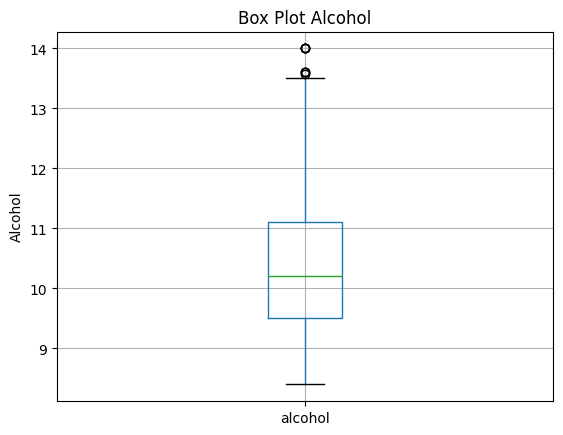

In [37]:
# Variável 'alcohol'
df.boxplot(column="alcohol")
plt.title("Box Plot Alcohol")
plt.ylabel("Alcohol")
plt.show()

In [38]:
# Método IQR
Q1 = df['alcohol'].quantile(0.25)
Q3 = df['alcohol'].quantile(0.75)
IQR = Q3 - Q1

# Detectando outliers
outliers_iqr_alcohol = df[(df['alcohol'] <= (Q1 - 1.5 * IQR)) | (df['alcohol'] >= (Q3 + 1.5 * IQR))]
print(outliers_iqr_alcohol)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
142             5.2              0.34         0.00             1.8      0.050   
144             5.2              0.34         0.00             1.8      0.050   
467             8.8              0.46         0.45             2.6      0.065   
588             5.0              0.42         0.24             2.0      0.060   
821             4.9              0.42         0.00             2.1      0.048   
1126            5.8              0.29         0.26             1.7      0.063   
1132            7.4              0.36         0.34             1.8      0.075   
1228            5.1              0.42         0.00             1.8      0.044   
1475            5.3              0.47         0.11             2.2      0.048   
1477            5.3              0.47         0.11             2.2      0.048   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
142                  27.0      

- Os outliers de **alcohol** foram mantidos, pois o teor alcoólico das bebidas pode de fato ser mais elevado em alguns casos.

In [39]:
print(f"Número de registros após tratamentos de outliers: {df.shape}")

Número de registros após tratamentos de outliers: (1527, 12)


- Foram removidos 72 registros de outliers.

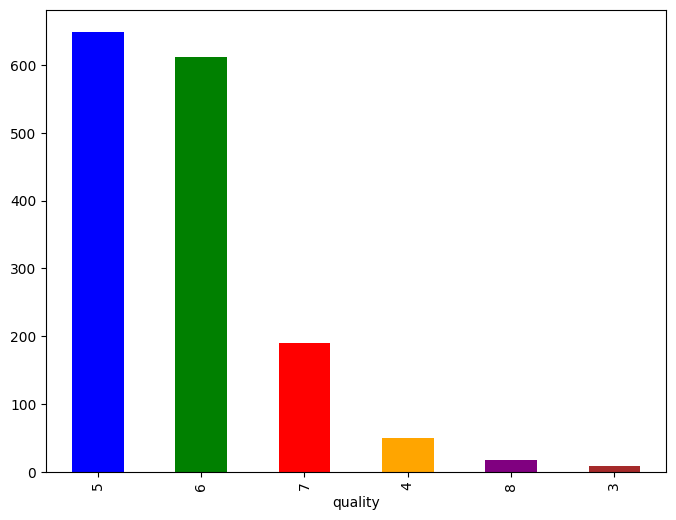

In [40]:
# B)
quality_counts = df['quality'].value_counts()
plt.figure(figsize=(8, 6))
quality_counts.plot(kind='bar', color=['blue', 'green', 'red', 'orange', 'purple', 'brown'])
plt.show()

In [41]:
# Contagem de vinhos para cada ranking de 'quality'
print(quality_counts)

quality
5    649
6    612
7    190
4     50
8     17
3      9
Name: count, dtype: int64


In [42]:
# Percentual de vinhos para cada ranking de 'quality'
print((df['quality'].value_counts(normalize=True) * 100))

quality
5    42.501637
6    40.078585
7    12.442698
4     3.274394
8     1.113294
3     0.589391
Name: proportion, dtype: float64


- **quality 5** - 649 das ocorrências (42.50%) de vinhos se enquadram na qualidade 5.
- **quality 6** - 612 das ocorrências (40.08%) de vinhos se enquadram na qualidade 6.
- **quality 7** - 190 das ocorrências (12.44%) de vinhos se enquadram na qualidade 7.
- **quality 4** - 50 das ocorrências (3.27%) de vinhos se enquadram na qualidade 4.
- **quality 8** - 17 das ocorrências (1.11%) de vinhos se enquadram na qualidade 8.
- **quality 3** - 9 das ocorrências (0.59%) de vinhos se enquadram na qualidade 3.

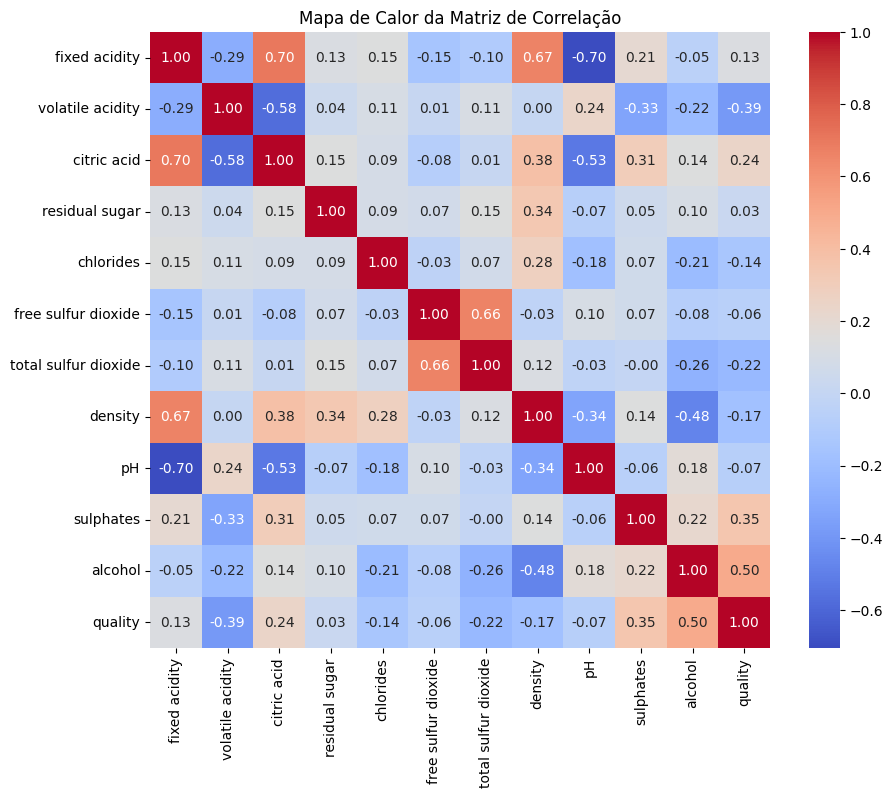

In [43]:
# C)
matriz_correlacao = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

In [44]:
# Separando as variáveis de correlação mais forte em uma lista
variaveis_corr = ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']

In [45]:
# Criando novo DataFrame com as variáveis de correlação mais forte
df_corr = df[variaveis_corr]

# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


In [46]:
# A)
X = df_corr # X contém as variáveis de correlação mais forte
y = df['quality'] # y contém apenas a variável target

In [47]:
# B)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Tamanho das bases treino e teste
print("Tamanho de X_train: ", X_train.shape)
print("Tamanho de y_train: ", y_train.shape)
print("Tamanho de X_test: ", X_test.shape)
print("Tamanho de y_test: ", y_test.shape)

Tamanho de X_train:  (1221, 5)
Tamanho de y_train:  (1221,)
Tamanho de X_test:  (306, 5)
Tamanho de y_test:  (306,)


# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [49]:
# A)
rf_model = RandomForestClassifier(random_state=42)

- Modelo iniciado.

In [50]:
# Treinando o modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- Modelo treinado.

In [51]:
# B)
y_pred = rf_model.predict(X_test) # Previsões do modelo

- Previsões realizadas com a base de teste.

# 5 - Avaliação

A) Avalie as principais métricas da Classificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


In [52]:
# A)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Acurária: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurária: 0.70
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.08      0.12        13
           5       0.71      0.85      0.77       117
           6       0.70      0.70      0.70       128
           7       0.66      0.55      0.60        42
           8       0.00      0.00      0.00         2

    accuracy                           0.70       306
   macro avg       0.40      0.36      0.37       306
weighted avg       0.67      0.70      0.68       306

Matriz de Confusão:
 [[ 0  1  3  0  0  0]
 [ 0  1  8  4  0  0]
 [ 0  0 99 18  0  0]
 [ 0  1 26 90 11  0]
 [ 0  0  3 16 23  0]
 [ 0  0  0  1  1  0]]


/home/dosmaus/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dosmaus/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dosmaus/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- Acurácia: a acurácia de 0.70 indica que 70% das previsões foram realizadas corretamente em relação ao total de previsões.
- Para as categorias **3** e **8**, o modelo não acertou nenhuma previsão, consequentemente zerando a **precisão** e **recall**.
- **Categoria 4**: 
    - Precisão: 0.33 para a categoria 4 indica que 33% das instâncias que foram previstas como sendo da categoria 4 realmente pertencem à categoria 4.
    - Recall: 0.08 para a categoria 4 indica que 8% das instâncias que pertencem à categoria 4 foram corretamente identificadas pelo modelo.
    - F1-score: 0.12 para a categoria 4 é a média harmônica da precisão e do recall para a categoria 4.
    - Matriz de Confusão -> Verdadeiro Positivo: 1, Falso Negativo: 12, Falso Positivo: 2, Verdadeiro Negativo: 291
- **Categoria 5**:
    - Precisão: 0.71 para a categoria 5 indica que 71% das instâncias que foram previstas como sendo da categoria 5 realmente pertencem à categoria 5.
    - Recall: 0.85 para a categoria 5 indica que 85% das instâncias que pertencem à categoria 5 foram corretamente identificadas pelo modelo.
    - F1-score: 0.77 para a categoria 5 é a média harmônica da precisão e do recall para a categoria 5.
    - Matriz de Confusão -> Verdadeiro Positivo: 99, Falso Negativo: 18, Falso Positivo: 40, Verdadeiro Negativo: 149
- **Categoria 6**:
    - Precisão: 0.70 para a categoria 6 indica que 70% das instâncias que foram previstas como sendo da categoria 6 realmente pertencem à categoria 6.
    - Recall: 0.70 para a categoria 6 indica que 70% das instâncias que pertencem à categoria 6 foram corretamente identificadas pelo modelo.
    - F1-score: 0.70 para a categoria 6 é a média harmônica da precisão e do recall para a categoria 6.
    - Matriz de Confusão -> Verdadeiro Positivo: 90, Falso Negativo: 38, Falso Positivo: 39, Verdadeiro Negativo: 139
- **Categoria 7**:
    - Precisão: 0.66 para a categoria 7 indica que 66% das instâncias que foram previstas como sendo da categoria 7 realmente pertencem à categoria 7.
    - Recall: 0.55 para a categoria 7 indica que 55% das instâncias que pertencem à categoria 7 foram corretamente identificadas pelo modelo.
    - F1-score: 0.60 para a categoria 7 é a média harmônica da precisão e do recall para a categoria 7.
    - Matriz de Confusão -> Verdadeiro Positivo: 23, Falso Negativo: 19, Falso Positivo: 12, Verdadeiro Negativo: 252
- A média ponderada foi puxada para cima graças às categorias que performaram no modelo.

- O modelo aprende melhor as categorias que possuem mais exemplos (majoritárias), como é o exemplo das categorias 5 e 6.
- Categorias minoritárias são praticamente ignoradas pelo modelo, como é o exemplo das categorias 3, 4 e 8.
- Ao analisar a matriz de confusão podemos observar que quando o modelo está em dúvida na classificação da ocorrência, tende a optar pelas categorias majoritárias, neste caso, as categorias 5, 6 e 7 (em uma escala menor).

In [53]:
# B)

- O modelo teve dificuldade (ou foi praticamente incapaz) para realizar previsões para as classe 3, 4 e 8, sendo que para  as categorias 3 e 8 o modelo não acertou nenhuma previsão.
- Com certeza a dificuldade de previsão do modelo se deve ao balanceamento dos dados, pois coincidentemente, as categorias 5 e 6 (majoritárias na base de dados), e a categoria 7 em uma escala menor, apresentaram um desempenho melhor no modelo, conforme mostram as métricas.

# 6 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

In [56]:
# A) Espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 'auto']
}

In [57]:
# Configurando o Randomized Search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

In [ ]:
# B) Executando o Randomized Search
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=

/home/dosmaus/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
145 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
98 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dosmaus/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dosmaus/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/dosmaus/.local/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/dosmaus

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
# Mostrando os melhores hiperparâmetros
best_params = random_search.best_params_
print(f"Melhores Hiperparâmetros: {best_params}")

Melhores Hiperparâmetros: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50}


In [60]:
# Treinando o modelo com os melhores hiperparâmetros encontrados
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features='log2', min_samples_split=5,
                       n_estimators=400, random_state=42)

In [63]:
# Realizando previsões com base em X_test
y_pred = best_rf_model.predict(X_test)

In [ ]:
# C)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 0.70
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.08      0.12        13
           5       0.71      0.83      0.76       117
           6       0.71      0.71      0.71       128
           7       0.70      0.62      0.66        42
           8       0.00      0.00      0.00         2

    accuracy                           0.70       306
   macro avg       0.41      0.37      0.38       306
weighted avg       0.68      0.70      0.68       306

Matriz de Confusão:
 [[ 0  1  3  0  0  0]
 [ 0  1  9  3  0  0]
 [ 0  0 97 20  0  0]
 [ 0  1 25 91 11  0]
 [ 0  0  3 13 26  0]
 [ 0  0  0  2  0  0]]


/home/dosmaus/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dosmaus/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dosmaus/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- A acurácia global de manteve a mesma em 70%.
- As categoria 3, 4 e 8 mantiveram as mesmas métricas obtidas pelo modelo antes da aplicação do Random Search.
- **Categoria 5**:
    - Precisão: 0.71 para a categoria 5 indica que 71% das instâncias que foram previstas como sendo da categoria 5 realmente pertencem à categoria 5.
    - Recall: 0.83 para a categoria 5 indica que 83% das instâncias que pertencem à categoria 5 foram corretamente identificadas pelo modelo.
    - F1-score: 0.76 para a categoria 5 é a média harmônica da precisão e do recall para a categoria 5.
    - Matriz de Confusão -> Verdadeiro Positivo: 97, Falso Negativo: 20, Falso Positivo: 40, Verdadeiro Negativo: 149
- **Categoria 6**:
    - Precisão: 0.71 para a categoria 6 indica que 71% das instâncias que foram previstas como sendo da categoria 6 realmente pertencem à categoria 6.
    - Recall: 0.71 para a categoria 6 indica que 71% das instâncias que pertencem à categoria 6 foram corretamente identificadas pelo modelo.
    - F1-score: 0.71 para a categoria 6 é a média harmônica da precisão e do recall para a categoria 6.
    - Matriz de Confusão -> Verdadeiro Positivo: 91, Falso Negativo: 37, Falso Positivo: 38, Verdadeiro Negativo: 140
- **Categoria 7**:
    - Precisão: 0.70 para a categoria 7 indica que 70% das instâncias que foram previstas como sendo da categoria 7 realmente pertencem à categoria 7.
    - Recall: 0.62 para a categoria 7 indica que 62% das instâncias que pertencem à categoria 7 foram corretamente identificadas pelo modelo.
    - F1-score: 0.66 para a categoria 7 é a média harmônica da precisão e do recall para a categoria 7.
    - Matriz de Confusão -> Verdadeiro Positivo: 26, Falso Negativo: 16, Falso Positivo: 11, Verdadeiro Negativo: 253

In [66]:
# D)

- **A categoria 5 teve uma leve piora no desempenho**, reduzindo o número de acertos:
    - Matriz de Confusão -> **Verdadeiro Positivo: 99**, Falso Negativo: 18, Falso Positivo: 40, Verdadeiro Negativo: 149
    - Matriz de Confusão -> **Verdadeiro Positivo: 97**, Falso Negativo: 20, Falso Positivo: 40, Verdadeiro Negativo: 149 (após RandomSearch)
- **A categoria 6 teve uma leve melhora no desempenho**, acertando uma ocorrência a mais:
    - Matriz de Confusão -> **Verdadeiro Positivo: 90**, Falso Negativo: 38, Falso Positivo: 39, Verdadeiro Negativo: 139
    - Matriz de Confusão -> **Verdadeiro Positivo: 91**, Falso Negativo: 37, Falso Positivo: 38, Verdadeiro Negativo: 140 (após RandomSearch)
- **A categoria 7 teve uma leve melhora no desempenho**, acertando três ocorrências a mais:
    - Matriz de Confusão -> **Verdadeiro Positivo: 23**, Falso Negativo: 19, Falso Positivo: 12, Verdadeiro Negativo: 252
    - Matriz de Confusão -> **Verdadeiro Positivo: 26**, Falso Negativo: 16, Falso Positivo: 11, Verdadeiro Negativo: 253 (após RandomSearch)

# 7 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?

- Acredito que, neste caso, o balanceamento das classes (por exemplo, SMOTE) deveria ter sido obrigatoriamente aplicado para que o modelo conseguisse realizar previsões de forma mais assertiva evitando o overfitting, uma vez que o modelo aprendeu bem e previu razoavelmente bem apenas as classes majoritárias, deixando as minoritárias de lado. 